## 3.3 학습 데이터 준비
- word2vec에 쓰일 학습데이터 준비 하기
- 한 문장짜리 corpus를 이용한다.

#### 3.3.1 맥락과 타깃
- word2vec에서 이용하는 신경망의 입력은 '맥락'이다.
- 정답 레이블은 맥락에 둘러싸인 중앙의 단어, 즉'타깃'이다.
- 신경망에 '맥락'을 입력했을 때 '타킷'이 출현할 확률을 높이는 것이다.

![image](https://github.com/choibigo/Study/assets/38881179/57c06552-90c0-4274-9a39-8a703856e785)

- 말뭉치로부터 목표로 하는 단어를 '타깃'으로, 그 주변 단어를 '맥락'으로 뽑아낸다.
- 우선 말뭉치 텍스트를 단어 ID로 변환한다.

In [51]:
import numpy as np

def preprocess(text):
    # text => words => id list

    text = text.lower()
    text = text.replace('.',' .')

    words = text.split(' ')# 문장을 단어 형태로 분할

    # 단어에 ID를 부여하고 ID의 리스트로 이용할 수 있도록 손질한다.
    word_to_id = {} # 단어로 ID 찾기
    id_to_word = {} # ID로 단어 찾기

    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[idx] for idx in words])

    return corpus, word_to_id, id_to_word

text = 'You say goodbye and I say hello .'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6 7]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '', 7: '.'}


- corpus로 부터 맥락과 타깃을 작성할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/91e44416-87d2-4444-87f5-d284509188ec)

In [52]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size+1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)

context, target = create_contexts_target(corpus, window_size=1)
print(context)
print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]
 [5 7]]
[1 2 3 4 1 5 6]


#### 3.3.2 원핫 표현으로 변환
- 맥락과 타깃을 원핫 표현으로 변경 해야 한다.

![image](https://github.com/choibigo/Study/assets/38881179/262afc12-25eb-4a3e-b39f-d5b87434e5ac)

- 원핫 벡터로 표현하면 기존 맥락의 형상은 (6,2)였으나 (6,2,7)이 된다.
- 원핫 벡터 까지 변형 했으면 학습할 데이터 준비는 끝났다.

In [53]:
import sys
sys.path.append("..")
from common.utill import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and i say hello'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

## 3.4 CBOW 모델 구현

![image](https://github.com/choibigo/Study/assets/38881179/8f82de85-1284-4f97-8e24-79acc4b59dae)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 26 |

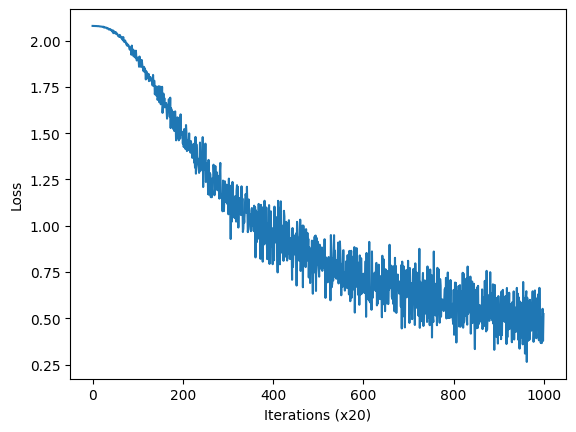

you [-1.09323256 -1.0567726   1.23941972  0.98861035 -0.97475144]
say [ 1.57988639  1.19802223 -1.56093056  0.0517583   1.22822751]
goodbye [-0.70556988 -0.64203345  0.46136032  1.44848161 -0.78546   ]
and [ 1.09860878  0.64854999 -1.14369006  1.74280226  0.71560942]
i [-0.72530677 -0.6072077   0.45487035  1.6659052  -0.77488171]
hello [-1.1561729  -1.34081556  1.28281166 -0.21579189 -1.27868787]
 [-0.75052217  1.29339362  0.86120858 -1.44891555  1.25222898]
. [-0.5612263  -1.11864459  0.65264389 -1.4791713  -1.12789616]


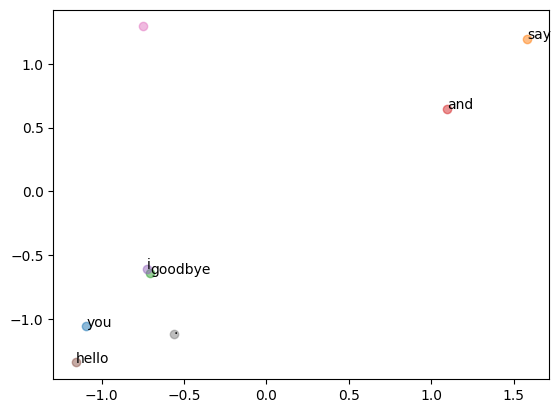

In [16]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from common.layers import MatMul, SoftmaxWithLoss
from common.trainer import Trainer
from common.optimizer import Adam
from common.utill import preprocess, create_contexts_target, convert_one_hot

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V = vocab_size # 입력 단어 개수
        H = hidden_size # hidden 층의 노드수 (입력 단어 차원을 몇 차원으로 줄일건지 결정 된다.)


        # 가중치 랜덤 초기화
        W_in = 0.01 * np.random.randn(V, H).astype(np.float64)
        W_out = 0.01 * np.random.randn(H, V).astype(np.float64)

        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        # 입력 레이어의 수는 window 수와 같다 왜냐하면 단어의 맥락의 수가 window 크기에 따라 결정되면 window 크기 개수 만큼 입력 되기 때문이다.

        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params = []
        self.grads = []
        for l in layers:
            self.params += l.params
            self.grads += l.grads
        
        self.word_vecs = W_in

    def forward(self, contexts, target):
        '''
        context : 3차원 넘파이 배열이라고 가정한다, (6,2,7)이된다, 6개의 데이터가 2개의 맥락을 가지는데 맥락이 원핫벡터로 표현하면 7개가 된다.
        '''
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss


    def backward(self, dout=1):
        '''
        - layer에 grad를 모아 놓는 용도 이다.
        - 이후 optimizer가 모여진 grad를 통해 weight를 updade한다.
        '''
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None
    
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and i say hello . '
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size) # target과 target에 대한 맥락 생성
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs # word_vecs 즉, input Weight 이다.
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])
    # hidden size를 5개로 했기 때문에, 단어 1개를 5개의 벡터로 표현할 수 있게 됬다.
    plt.annotate(word, (word_vecs[word_id][0], word_vecs[word_id][1]))
    plt.scatter(word_vecs[word_id][0], word_vecs[word_id][1], alpha=0.5)


plt.show()